# Linear diffusion HW

Same imports from the main file 

In [1]:
# imports
import numpy as np
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel, ylim

from landlab.plot.imshow import imshow_grid
from landlab import RasterModelGrid 
from landlab.components import LinearDiffuser
from landlab.components import FlowAccumulator

## 1. 

Run the example provided ($D$ = 0.01 $m^2yr^{-1}$ and $U$ = 0.0001 m $yr^{-1}$) to steady state. Save a plot of the final cross section to hand in. 

In [38]:
mg = RasterModelGrid((41, 5), 5.0)
z_vals = mg.add_zeros("topographic__elevation", at="node")

# initialize some values for plotting
ycoord_rast = mg.node_vector_to_raster(mg.node_y)
ys_grid = ycoord_rast[:, 2]

# open upper and lower boundary condition, closed on the sides
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)

now comes the parameters to be set and some other parameters

In [39]:
D = 0.01
uplift_rate = 0.0001

lin_diffuse = LinearDiffuser(mg, linear_diffusivity=D)

runtime = 1000000 
dt = 0.5 * mg.dx * mg.dx / D
nt = int(runtime // dt)
time_counter = 0
uplift_per_step = uplift_rate * dt
ys = np.arange(mg.number_of_node_rows * mg.dx - mg.dx)

steady state topography calculations as in class

In [40]:
# location of divide or ridge crest -> middle of grid
divide_loc = (mg.number_of_node_rows * mg.dx - mg.dx) / 2
# half-width of the ridge
half_width = (mg.number_of_node_rows * mg.dx - mg.dx) / 2
# analytical solution for elevation under linear diffusion at steady state
zs = (uplift_rate / (2 * D)) * (np.power(half_width, 2) - np.power(ys - divide_loc, 2))

a little aux plot function to make things more readable and compact

In [37]:
def short_plot(elev_rast, **kwargs):
    plot(ys_grid, elev_rast[:, 2], "k-", label="current model topography")
    plot(ys, zs, "k--", label="analytical solution")
    if "title" in kwargs:
        title(kwargs["title"])
    xlabel("horizontal distance (m)")
    ylabel("vertical distance (m)")
    if "percent" in kwargs:
        plot(ys, zs * 0.75, "b--", label="75% of analytical solution")
        plot(ys, zs * 0.5, "r--", label="50% of analytical solution")
    if "legend_loc" in kwargs:
        legend(loc=kwargs["legend_loc"])
    else:
        legend()
    show()

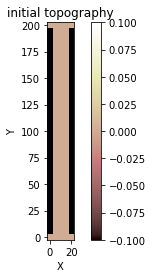

In [41]:
figure(1)
imshow_grid(mg, "topographic__elevation")
title("initial topography")
show()

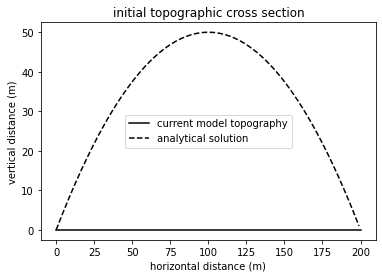

In [42]:
figure(2)
elev_rast = mg.node_vector_to_raster(mg.at_node["topographic__elevation"])
short_plot(
    elev_rast, 
    title ="initial topographic cross section")


now the middle and final cross section profile plots

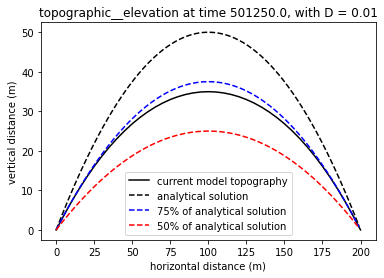

In [43]:
for i in range(nt):
    mg["node"]["topographic__elevation"][mg.core_nodes] += uplift_per_step
    lin_diffuse.run_one_step(dt)
    time_counter += dt

    if i == int(nt // 2):
        figure(3)       
        short_plot(
            elev_rast=mg.node_vector_to_raster(mg.at_node["topographic__elevation"]),
            title=f"topographic__elevation at time {time_counter}, with D = {D}",
            percent=True
        )

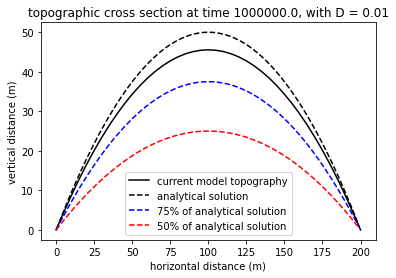

In [44]:
figure(4)
short_plot(
    elev_rast=mg.node_vector_to_raster(mg.at_node["topographic__elevation"]),
    title=f"topographic cross section at time {time_counter}, with D = {D}",
    percent=True
)

and now we use a flow router to find the slopes

Text(0.5, 1.0, 'slope of the hillslope at time 1000000.0, with D = 0.01')

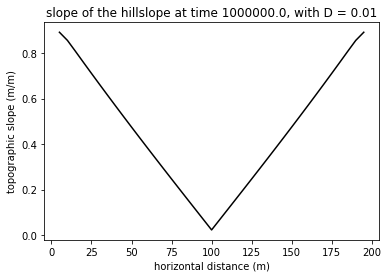

In [45]:
fr = FlowAccumulator(mg)
fr.run_one_step()
# plot slopes
plot(
    mg.node_y[mg.core_nodes],
    mg.at_node["topographic__steepest_slope"][mg.core_nodes],
    "k-",
)
xlabel("horizontal distance (m)")
ylabel("topographic slope (m/m)")
title(f"slope of the hillslope at time {time_counter}, with D = {D}")

- *What is the total relief on the hillslope (maximum elevation minus minimum elevation, approximate is fine)?* 

The total relief is approximately $45m$.

- *What is happening to the slope across the hillslope (plot after code block 9)?*

The slopes are the closest to 0 near the top of the hill and the largest as they go downhill.

- *Why is the change in slope necessary at steady state? (Answer questions with one or two sentences at most.)*

As sediment moves downhill and accumulates, sediment transport needs to increase for erosion to keep up with uplift. Sediment transport being proportional to slope should therefore increase downhill.

## 2.

How do you think the relief and slopes would change if you increase $D$ to 0.1 $m^2yr^{-1}$? In four sentences or less, describe what you think will happen and why. Use the equations to help you with your prediction.

Since sediment transport is proportional to the slope via the Diffusivity constant $D$ as
$$
q_s=-D\frac{dz}{dx},
$$
then an increase in $D$ will increase the magnitude of $q_s$ and therefore will create a topography with less relief. We can also see this from the analitical solution
$$
z = z_0 -\frac{\varepsilon}{D} \frac{x^2}{2}
$$
where if we increase the value of $D$ we get a flatter parabola, i.e. less relief and more gentle slopes.

## 3. 
Now, in Code Block 3, set $D$ = 0.1 $m^2yr^{-1}$ and rerun the hillslope evolution from an initial flat. Save a plot of the final cross section to hand in.

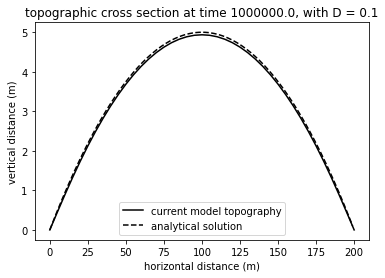

In [47]:
mg = RasterModelGrid((41, 5), 5.0)
z_vals = mg.add_zeros("topographic__elevation", at="node")
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)

D = 0.1
uplift_rate = 0.0001
lin_diffuse = LinearDiffuser(mg, linear_diffusivity=D)
time_counter = 0
uplift_per_step = uplift_rate * dt
zs = (uplift_rate / (2 * D)) * (np.power(half_width, 2) - np.power(ys - divide_loc, 2))

for i in range(nt):
    mg["node"]["topographic__elevation"][mg.core_nodes] += uplift_per_step
    lin_diffuse.run_one_step(dt)
    time_counter += dt

figure(5)
short_plot(
    elev_rast=mg.node_vector_to_raster(mg.at_node["topographic__elevation"]),
    title=f"topographic cross section at time {time_counter}, with D = {D}"
)


*Discuss how the hillslope differs from the results in question 1. Discuss how the results are similar to or different from your prediction in question 2. It is OK if your intuition was wrong! If you were wrong, can you see why from the equations after a second look?*

The new hillslope parabola has a coefficient that is a tenth of the original which maches in the graph with the model being on a scale of a tenth as well. 

The results match my predictions, one thing that I was not expecting was the convergence being faster as the curves are closer even after considering the scale which I'm guessing has something to do with the numerical method used to solve it.

## 4.

*What do you think will happen when you increase **uplift_rate** (Code Block 4) by a factor of 10?  Will the topography be different? Will the relieve and slopes change? If yes, how and why?*

For steady state to hold the erosion rate and the uplift have to match, so I think the value of $\varepsilon = U$ and therefore from the differential equation or the analitical solution the scale of the hillslope will increase in an order of magnitude of 10 as well. This will increase the relief and the slopes in the same way. 


*Answer these questions first, and then rerun the code with **uplift_rate** = 0.001 m $yr^{-1}$.(Make sure you change $D$ - Code Block 3 - back to the original value of 0.01 $m^2yr^{-1}$ and restart from a flat surface.) Illustrate the final steady state topography.*

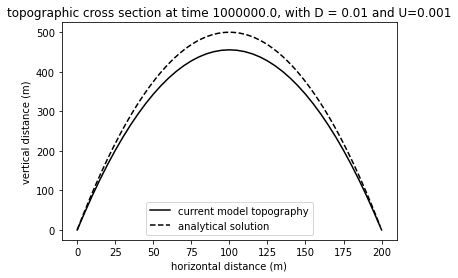

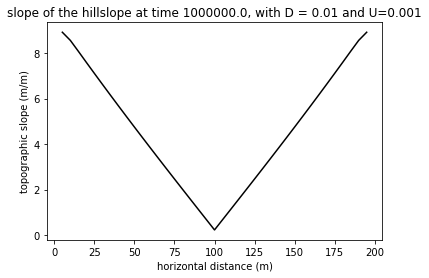

In [50]:
mg = RasterModelGrid((41, 5), 5.0)
z_vals = mg.add_zeros("topographic__elevation", at="node")
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)

D = 0.01
uplift_rate = 0.001
lin_diffuse = LinearDiffuser(mg, linear_diffusivity=D)
time_counter = 0
uplift_per_step = uplift_rate * dt
zs = (uplift_rate / (2 * D)) * (np.power(half_width, 2) - np.power(ys - divide_loc, 2))

for i in range(nt):
    mg["node"]["topographic__elevation"][mg.core_nodes] += uplift_per_step
    lin_diffuse.run_one_step(dt)
    time_counter += dt

figure(6)
short_plot(
    elev_rast=mg.node_vector_to_raster(mg.at_node["topographic__elevation"]),
    title=f"topographic cross section at time {time_counter}, with D = {D} and U={uplift_rate}"
)

figure(7)
fr = FlowAccumulator(mg)
fr.run_one_step()
# plot slopes
plot(
    mg.node_y[mg.core_nodes],
    mg.at_node["topographic__steepest_slope"][mg.core_nodes],
    "k-",
)
xlabel("horizontal distance (m)")
ylabel("topographic slope (m/m)")
title(f"slope of the hillslope at time {time_counter}, with D = {D} and U={uplift_rate}")
show()

*Discuss how these results differ from the results in question 1 and how the results match (or do not) your intuition. It is OK if your intuition was wrong.*

The hillslope is 10 times larger than the original one as expected and the convergence looks about as good as in the first one. Slopes are also a magnitude of 10 larger.